In [35]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector

In [36]:
n = 4
secret_string = "1010"

     ┌───┐          ┌───┐             ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─────────────┤M├───
     ├───┤┌───┐  │  └┬─┬┘             └╥┘   
q_1: ┤ H ├┤ H ├──┼───┤M├───────────────╫────
     ├───┤└───┘  │   └╥┘         ┌───┐ ║ ┌─┐
q_2: ┤ H ├───────┼────╫───────■──┤ H ├─╫─┤M├
     ├───┤┌───┐  │    ║  ┌─┐  │  └───┘ ║ └╥┘
q_3: ┤ H ├┤ H ├──┼────╫──┤M├──┼────────╫──╫─
     ├───┤├───┤┌─┴─┐  ║  └╥┘┌─┴─┐      ║  ║ 
q_4: ┤ X ├┤ H ├┤ X ├──╫───╫─┤ X ├──────╫──╫─
     └───┘└───┘└───┘  ║   ║ └───┘      ║  ║ 
c: 4/═════════════════╩═══╩════════════╩══╩═
                      1   3            0  2 


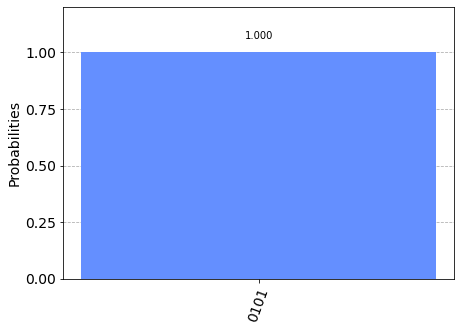

In [39]:
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(n)
for i in range(n):
    qc.h(i)
for i in range(n):
    if secret_string[i] == "1":
        qc.cx(i, n)
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i, i)
print(qc.draw())
sim = Aer.get_backend('aer_simulator')
counts = sim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)